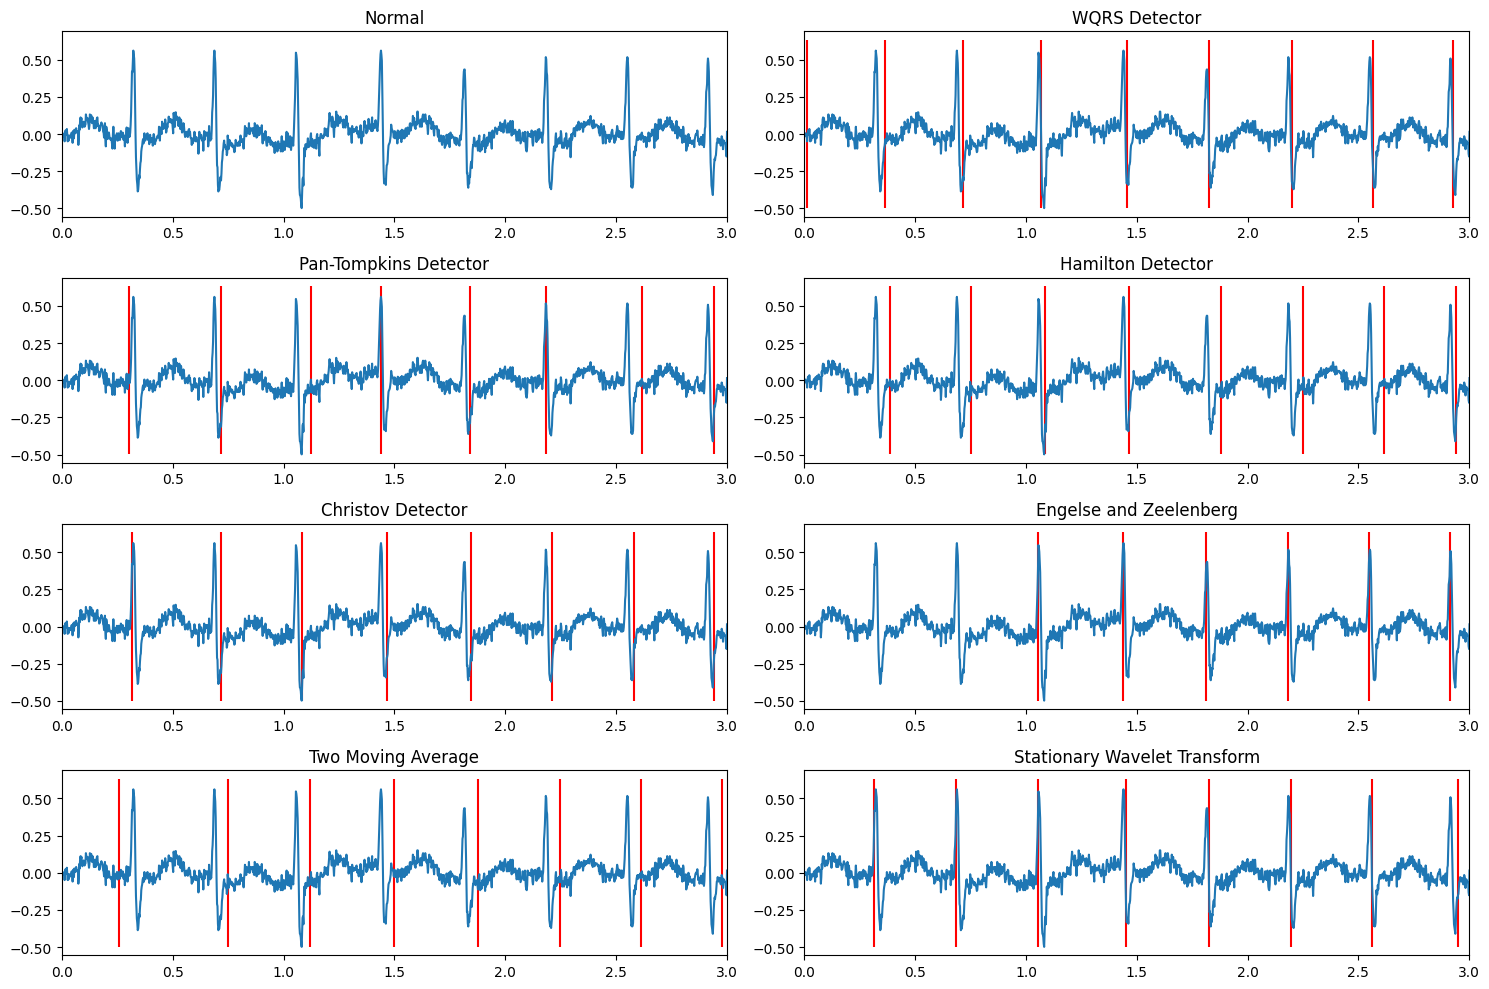

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from ecgdetectors import Detectors
import neurokit2 as nk

from EcdDataConverter import import_mat

data = import_mat('./files/JS00005.hea', './files/JS00005.mat')
canal = data.I
length = len(canal)
t = 1 / data.frequency
time = np.arange(t, length * t + t, t)

detector = Detectors(data.frequency)

def plot_detector_results(ax, detector_results, title):
    ax.vlines(x=detector_results, ymin=min(canal), ymax=max(canal), color="r")
    ax.plot(time, canal)
    ax.set_xlim(0, 3)
    ax.set_title(title)
    
detectors = [
    ("Normal", []),
    ("WQRS Detector",                [r * t for r in detector.wqrs_detector(canal)]),
    ("Pan-Tompkins Detector",        [r * t for r in detector.pan_tompkins_detector(canal)]),
    ("Hamilton Detector",            [r * t for r in detector.hamilton_detector(canal)]),
    ("Christov Detector",            [r * t for r in detector.christov_detector(canal)]),
    ("Engelse and Zeelenberg",       [r * t for r in detector.engzee_detector(canal)]),
    ("Two Moving Average",           [r * t for r in detector.two_average_detector(canal)]),
    ("Stationary Wavelet Transform", [r * t for r in detector.swt_detector(canal)])
]
fig, axs = plt.subplots(4, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for ax, (title, results) in zip(axs.flat, detectors):
    plot_detector_results(ax, results, title)


plt.tight_layout()
plt.show()


6


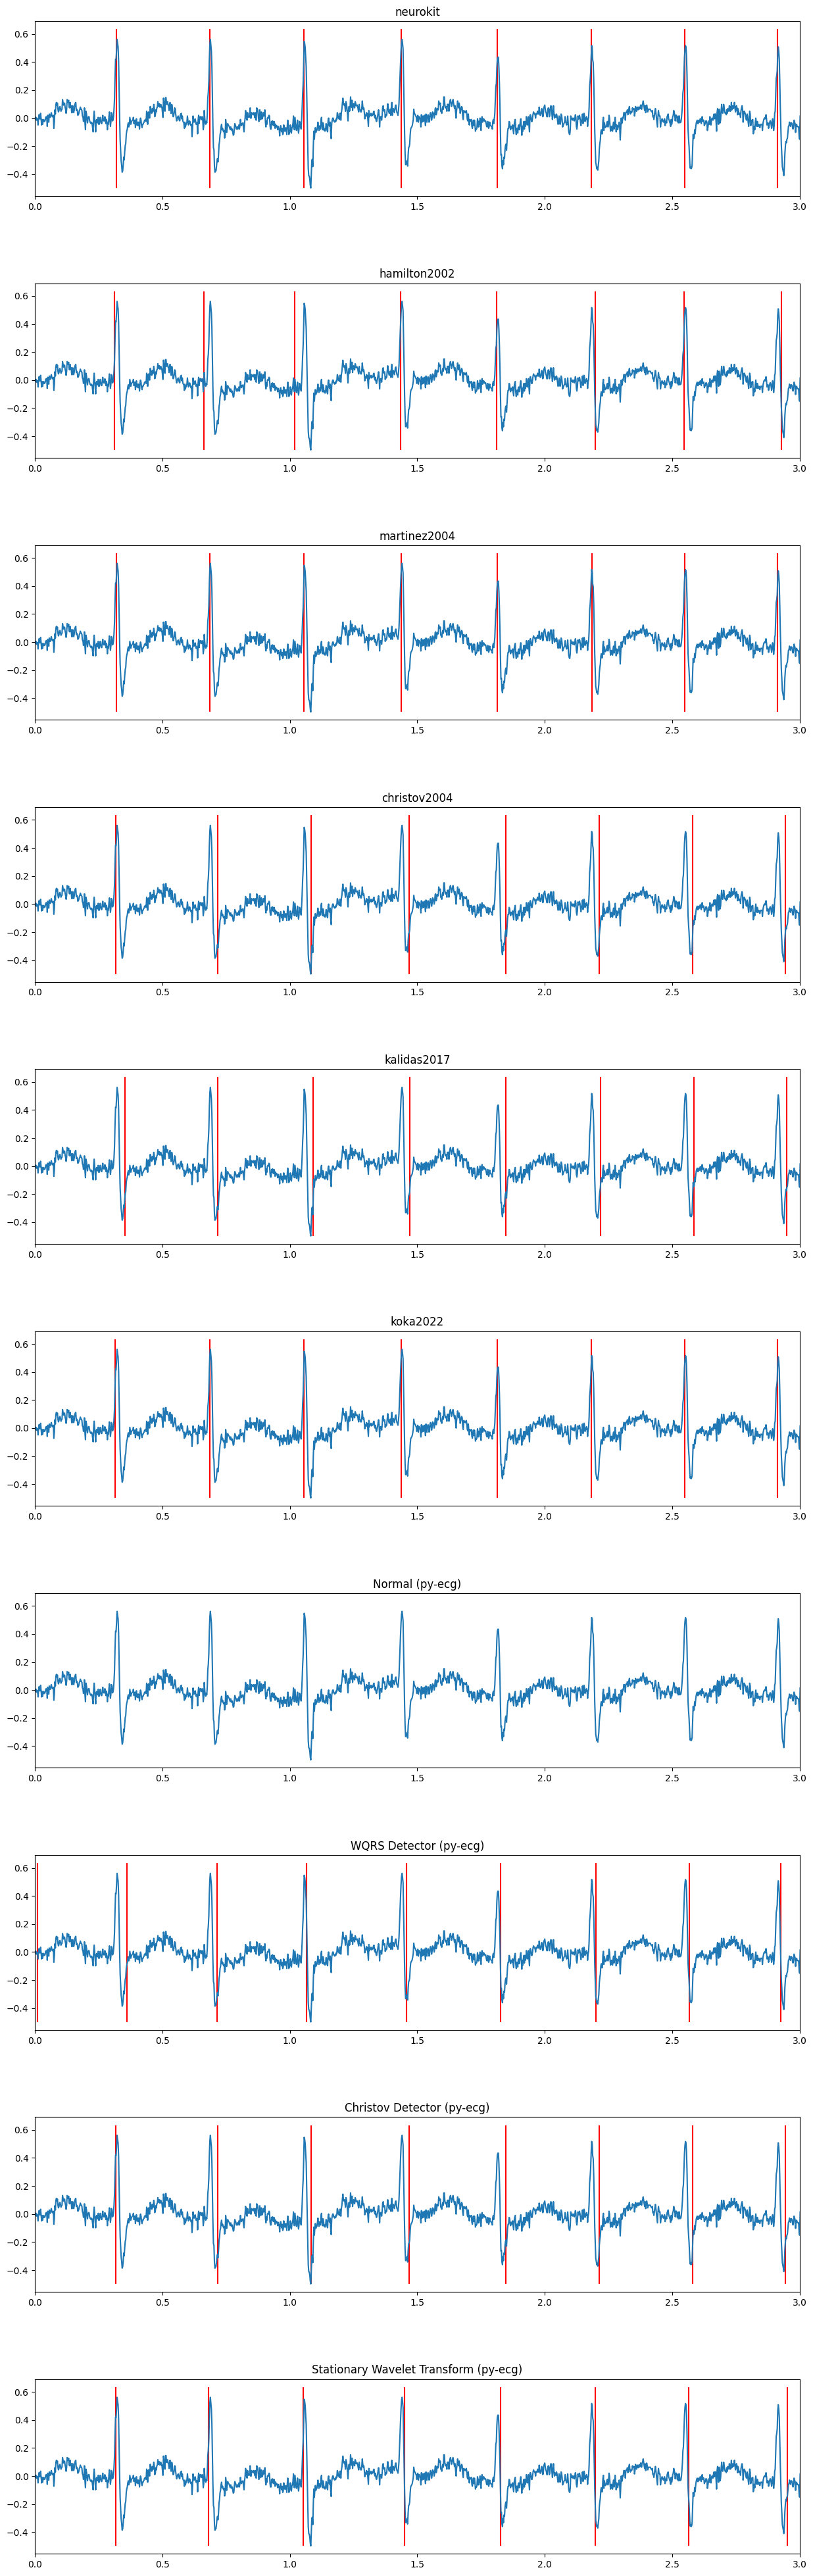

In [81]:
types =  [
    'neurokit',
    'hamilton2002',
    'martinez2004',
    'christov2004',
    'kalidas2017',
    'koka2022'
]

print(len(types))

fig, axs = plt.subplots(10, 1, figsize=(15, 50))
fig.subplots_adjust(hspace=0.5)

for i, type in enumerate(types):
    frame =  nk.ecg_peaks(data.I, data.frequency, method=type)[0]
    frame = frame[frame['ECG_R_Peaks'] == 1]
    result = [r * t for r in frame.index.tolist()]
    plot_detector_results(axs[i], result, type)

detectors = [
    ("Normal (py-ecg)", []),
    ("WQRS Detector (py-ecg)",                [r * t for r in detector.wqrs_detector(canal)]),
    ("Christov Detector (py-ecg)",            [r * t for r in detector.christov_detector(canal)]),
    ("Stationary Wavelet Transform (py-ecg)", [r * t for r in detector.swt_detector(canal)])
]

for i, measure in enumerate(detectors):
    plot_detector_results(axs[i + len(types)], measure[1], measure[0])

plt.show()